<a href="https://colab.research.google.com/github/dineshRaja29/StochasticGradientDescentImplementation/blob/main/SGDscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='green'><b>Implementation of SGD </b></font>

We are implementing SGD using basic python libraries for linear regression on boston housing dataset

###<font color='green'><b>IMPORTING LIBRARIES </b></font>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import random 
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.datasets import load_boston
import sklearn
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

/home/dinesh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


###<font color='green'><b>DATASET PREPARATION </b></font>

In [ ]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
print("*** Head ******",X.head())

*** Head ****** 
         0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [ ]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,\
                                   Y, test_size = 0.33, random_state = 5)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Y_train = np.array(Y_train)
stddev = np.std(Y_train)
mean = np.mean(Y_train)
Y_train = (Y_train - mean)/stddev
Y_test = (Y_test - mean)/stddev

###<font color='green'><b>ALGORITHM </b></font>

In [ ]:
start_point = random.randint(0,len(X_train)-1)
W = np.array(X_train[start_point, :])
b = Y_train[start_point] # The algorithm starts at W & b
r = float(1) # step size 
precision = 0.00001
max_iters = 100 # maximum number of iterations
iters = 0 #iteration counter
W_optimal = W   
b_optimal = b

def summation_w(W, r, b):
    result = 0
    loop_count = random.randint(1,len(X_train)-1)
    for i in range(0,loop_count):
        index = random.randint(0,len(X_train)-1);
        w = np.array(W)
        w = np.transpose(w)
        x = np.array(X_train[index, : ])
        y = int(Y_train[index])
        result = result + ( x * 2 * (-1) * (y - float(np.matmul(w,x)) - float(b)))
    result = result / loop_count
    return result  

def summation_b(W, r, b):
    result = 0
    loop_count = random.randint(1,len(X_train)-1)
    for i in range(0,loop_count):
        index = random.randint(0,len(X_train)-1);
        w = np.array(W)
        w = np.transpose(w)
        x = np.array(X_train[index, : ])
        y = int(Y_train[index])
        result = np.array(result + ((-1)*2  *(y - float(np.matmul(w,x)) - float(b))))
    result = result / loop_count
    return result  

w_iteration_stop = True
b_iteration_stop = True

while iters < max_iters:
    if(all(np.array(abs((np.array(W_optimal) -  np.array(W)))) == precision) and iters > 1):
        print("W is ", W)
        print("W optimal is ",W_optimal)
        print(" (np.array(W_optimal) -  np.array(W))",np.array(W_optimal) -  np.array(W))
        print("(np.array(W_optimal) -  np.array(W)", abs(np.array(W_optimal) -  np.array(W)))
        print("true case is ",abs(np.array(W_optimal) -  np.array(W)) > 0.000001)
        w_iteration_stop = False
        print("***iterator for w ",iters)
    if(abs(b_optimal - b) == precision and iters > 1):
        b_iteration_stop = False
        print("***iterator for b ",iters)
    W = W_optimal
    b = b_optimal
    if(w_iteration_stop):
        W_optimal = W - r * np.array(summation_w(W,r,b))
    if(b_iteration_stop):
        b_optimal = b - r *summation_b(W,r,b)
    iters+=1
    r/=2

print("*** w optimal **********", (W_optimal))
print("***  b **********", b_optimal)
print("iters",iters)

*** w optimal ********** [ 0.28489816  0.2886467  -0.25916833  0.1482872  -0.14143133 -0.0922643
 -0.23714651  0.03276024 -0.03656666 -0.07650143 -0.01564441  0.3712276
 -0.02316345]
***  b ********** -0.11673976940362175
iters 100


###<font color='green'><b>RESULTS</b></font>

In [ ]:
lm = linear_model.SGDRegressor(max_iter=1000, tol=1e-5)
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
sklearn_mse = mean_squared_error(Y_test, Y_pred)
print("** Mean Square Error on Sklearn implementation of Linear Regression is *** ",sklearn_mse )

Y_pred_mine = []
for point in X_test:
    x = np.array(point)
    w = np.transpose(W_optimal)
    predict = float(np.matmul(w,x)) + b_optimal;
    Y_pred_mine.append(predict)
sklearn_mse = mean_squared_error(Y_test, Y_pred_mine)
print("** Mean Square Error on Our Implementation of Linear Regression is *** ",sklearn_mse )    

** Mean Square Error on Sklearn implementation of Linear Regression is ***  0.3659056054690585
** Mean Square Error on Our Implementation of Linear Regression is ***  1.2245485684581974


###<font color='green'><b>VISUAL REPRESENTATION OF RESULTS </b></font>

####<font color='green'><b> Actual Prediction Vs Own Prediction

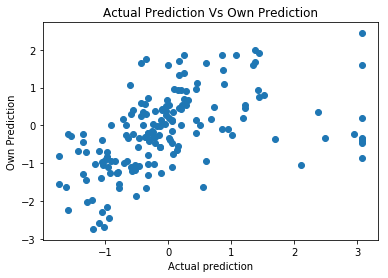

In [ ]:
plt.scatter(Y_test, Y_pred_mine)
plt.xlabel("Actual prediction")
plt.ylabel("Own Prediction")
plt.title("Actual Prediction Vs Own Prediction")
plt.show()

####<font color='green'><b>Actual Prediction Vs Sklearn Prediction

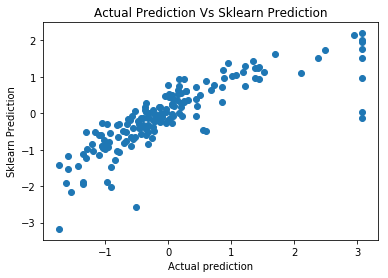

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual prediction")
plt.ylabel("Sklearn Prediction")
plt.title("Actual Prediction Vs Sklearn Prediction")
plt.show()

###<font color='green'><b>SUMMARY </b></font>

In [ ]:
t = PrettyTable(['Sklearn Weights '])
t.add_row([lm.coef_ ])
print(t)
t_own = PrettyTable(['Own Implementation Weights'])
t_own.add_row([W_optimal])
print(t_own)

+--------------------------------------------------------------------------+
|                             Sklearn Weights                              |
+--------------------------------------------------------------------------+
| [-0.12747451  0.07028662 -0.06074043  0.02479953 -0.10890445  0.33465173 |
|  -0.0506078  -0.2650946   0.14354586 -0.07930649 -0.22583017  0.11304745 |
|                               -0.3641685 ]                               |
+--------------------------------------------------------------------------+
+-------------------------------------------------------------------------+
|                        Own Implementation Weights                       |
+-------------------------------------------------------------------------+
| [ 0.28489816  0.2886467  -0.25916833  0.1482872  -0.14143133 -0.0922643 |
|  -0.23714651  0.03276024 -0.03656666 -0.07650143 -0.01564441  0.3712276 |
|                               -0.02316345]                              |
+----

In [ ]:
t = PrettyTable(['Sr.No ', 'Implementation Detail','MSE'])
t.add_row([1,'Scikit learn implementation','0.36'])
t.add_row([2,'Own implementation','1.22'])
print(t)

+--------+-----------------------------+------+
| Sr.No  |    Implementation Detail    | MSE  |
+--------+-----------------------------+------+
|   1    | Scikit learn implementation | 0.36 |
|   2    |      Own implementation     | 1.22 |
+--------+-----------------------------+------+
